In [125]:
import osmnx as ox
%matplotlib inline
ox.config(log_console=True, use_cache=True)

In [169]:
import numpy as np
import pandas as pd
import glob
from pykrige.ok import OrdinaryKriging
from pykrige.kriging_tools import write_asc_grid
import pykrige.kriging_tools as kt
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Path, PathPatch
import geopandas as gpd

In [170]:
data = pd.read_csv('./796_wells_lat_long.csv')
data.head()

,R_date,Latitude,Longitude,24/04/1995 12:00,24/04/2000 12:00,25/04/2005 12:00,26/04/2010 12:00,27/04/2015 12:00
0,BA003_A,22.84,90.52,-0.34,-0.24,-0.68,-1.29,-0.81
1,BA008_A,22.49,90.07,1.36,1.61,1.21,1.48,1.66
2,BA009_B,22.82,90.21,-0.21,0.14,-0.26,NaN,-0.18
3,BA010_A,22.83,90.28,0.81,1.41,1.21,NaN,1.31
4,BA011_A,22.96,90.52,0.25,1.83,0.80,NaN,0.90


In [171]:
country = gpd.read_file('./Bangladesh.shp')
# total boundary of Bangladesh
xmin, ymin, xmax, ymax = country.total_bounds
country.total_bounds

array([88.02833557, 20.58525085, 92.67366791, 26.63194466])

In [172]:
col = '24/04/1995 12:00'
data95 = data.iloc[:,1:4].loc[data[col].notna()].copy()
data95.columns = ['Lat','Lon','Z']
data95.sample(n=5)

,Lat,Lon,Z
109,23.74,90.68,-0.23
384,24.01,89.01,7.44
491,22.76,90.97,3.28
559,26.11,89.13,44.23
45,23.55,91.11,-2.36


In [173]:
lats = np.array(data95.Lat)
lons = np.array(data95.Lon)
zdata = np.array(data95['Z'])
# data95['Z'].describe()

In [174]:
# Dividing area of Bangladesh into multiple rasters by lon and lat.
# Bangladesh Area is divided into 100 * 100 subarea based on lon and lat
xmin = xmin - 0.01
xmax = xmax + 0.01

ymin = ymin - 0.01
ymax = ymax + 0.01

grid_lon = np.linspace(xmin,xmax, 100)
grid_lat = np.linspace(ymin,ymax, 100)

### Run the OrdinaryKriging methodm the variogram_model is gaussian

### Plot the spatial interpolation result with ordinary kriging using 'gaussian' variogram model


Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'hole-effect' Variogram Model
Partial Sill: 610.4639520500522
Full Sill: 610.4639520735556
Range: 6.643171567051606
Nugget: 2.3503431597947792e-08 

Calculating statistics on variogram model fit...
Executing Ordinary Kriging...

[[15.20997544966631 15.129877678291708 15.048809829807356 ...
  7.264796530008181 7.661874995449519 8.060883510268088]
 [15.005839785565565 14.920801476323085 14.834214599937281 ...
  6.848037570268143 7.285030844274899 7.718306402427141]
 [14.796514113718414 14.705588298382489 14.6140018258169 ...
  6.48887377110267 6.963180885506676 7.426479673593152]
 ...
 [63.030052848116625 65.80630898054396 68.7078973986167 ...
  13.520051080203814 13.55946115766451 13.601389254696644]
 [65.06654325489357 67.98390752003183 71.06788974958054 ...
  13.569360004167226 13.603410458692295 13.640039003175962]
 [66.4646212826524 69.41763375270804 72.5389080571794 ...
  13.61429

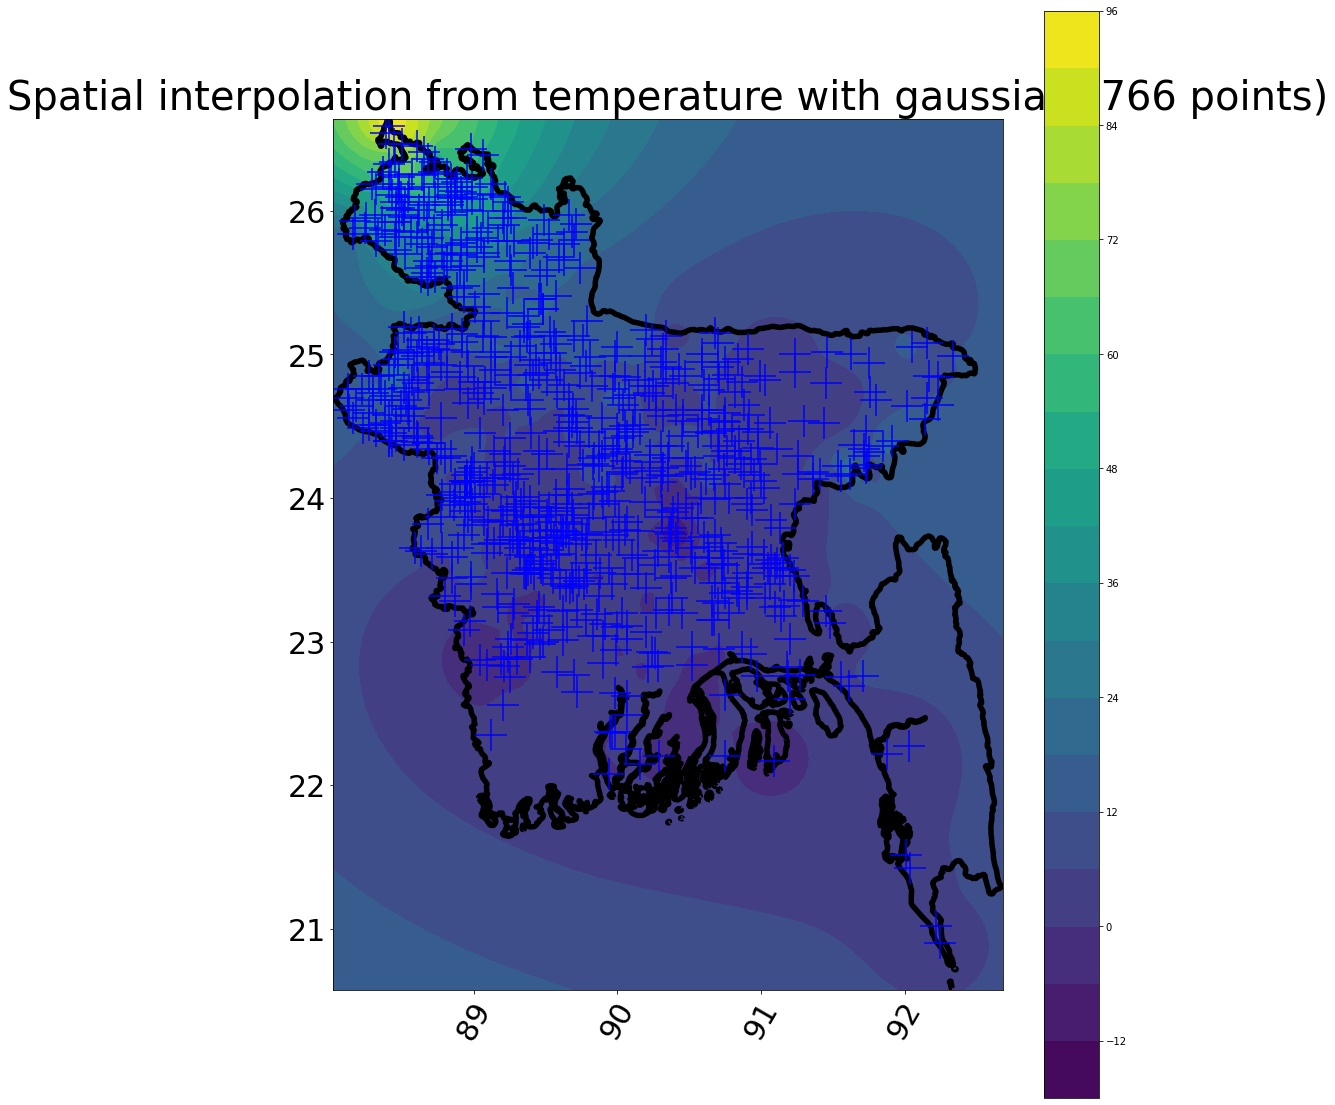

In [178]:
OK = OrdinaryKriging(
    lons,
    lats,
    zdata,
    variogram_model='hole-effect',
    verbose=True,
    enable_plotting=False,
    nlags=20
)

z1, ss1 = OK.execute('grid', grid_lon, grid_lat)
print(z1)

xintrp, yintrp = np.meshgrid(grid_lon, grid_lat)
fig, ax = plt.subplots(figsize=(15,20))
ax.set_aspect('equal')
boundarygeom = country.geometry

# contour = plt.contour(xintrp, yintrp, z1, 20, cmap='viridis')
contour = plt.contourf(xintrp, yintrp, z1, 20, cmap='viridis')



# contour = plt.scatter(xintrp, yintrp)

plt.colorbar(contour)

country.plot(ax=ax, color='none', linewidth=5.5, edgecolor='black')

npts = len(lons)

pt = plt.scatter(lons, lats, marker='+', c='b', s=1000, edgecolor='black')

plt.xticks(fontsize = 30, rotation=60)
plt.yticks(fontsize = 30)

# #Tempreture
plt.title('Spatial interpolation from temperature with gaussian (%d points)' % npts,fontsize = 40)
plt.show()

In [20]:
fig = pt.get_figure()
print(dir(pt))


['_A', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_add_checker', '_agg_filter', '_alias_map', '_alpha', '_animated', '_antialiaseds', '_axes', '_bcast_lwls', '_capstyle', '_check_update', '_clipon', '_clippath', '_contains', '_default_contains', '_edge_default', '_edgecolors', '_facecolors', '_factor', '_get_clipping_extent_bbox', '_gid', '_hatch', '_hatch_color', '_in_layout', '_is_filled', '_is_stroked', '_joinstyle', '_label', '_linestyles', '_linewidths', '_mouseover', '_offset_position', '_offsets', '_offsetsNone', '_oid', '_original_edgecolor', '_original_facecolor', '_path_effects', '_paths', '_picker', '_pickradius', '_prepare_points', '_propobservers', '_rasterized

<AxesSubplot:title={'center':'Spatial interpolation from temperature with gaussian (766 points)'}>

In [13]:
fig.savefig('krig.png')

In [ ]:
Figure - Axes - Axis

In [15]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

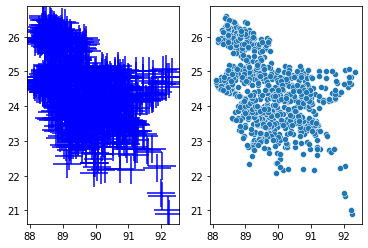

In [50]:
import seaborn as sns
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.scatter(lons, lats, marker='+', c='b', s=npts)
sns.scatterplot(x=lons,y=lats,ax=ax2)

In [42]:

!pip install seaborn

     |████████████████████████████████| 285 kB 130 kB/s 


In [43]:
import seaborn

In [48]:
data.values

array([['BA003_A', 22.84, 90.52, ..., -0.68, -1.29, -0.81],
       ['BA008_A', 22.49, 90.07, ..., 1.21, 1.48, 1.66],
       ['BA009_B', 22.82, 90.21, ..., -0.26, nan, -0.18],
       ...,
       ['TA037_B', 24.31, 89.97, ..., 7.75, 7.06, nan],
       ['TA038_B', 24.48, 90.0, ..., 7.51, 7.4, 7.3],
       ['TA039_A', 24.29, 89.89, ..., 6.07, 5.75, 4.96]], dtype=object)

<AxesSubplot:>

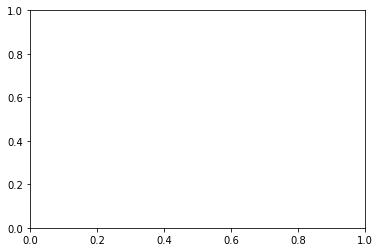

In [55]:
plt.gca()

In [83]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd

In [95]:
well = pd.read_csv('./796_wells_lat_long.csv')
well.head()

,R_date,Latitude,Longitude,24/04/1995 12:00,24/04/2000 12:00,25/04/2005 12:00,26/04/2010 12:00,27/04/2015 12:00
0,BA003_A,22.84,90.52,-0.34,-0.24,-0.68,-1.29,-0.81
1,BA008_A,22.49,90.07,1.36,1.61,1.21,1.48,1.66
2,BA009_B,22.82,90.21,-0.21,0.14,-0.26,NaN,-0.18
3,BA010_A,22.83,90.28,0.81,1.41,1.21,NaN,1.31
4,BA011_A,22.96,90.52,0.25,1.83,0.80,NaN,0.90


In [100]:
data = well.iloc[:,1:]
max_el = max(data.iloc[:,3:].max())
min_el = min(data.iloc[:,3:].min())
def process_data(column,data=data):
    df = data.loc[data[column].notna(),['Longitude','Latitude',column]]
    lons = np.array(df['Longitude'])
    lats = np.array(df['Latitude'])
    z = np.array(df[column])
    return {
        'lons':lons,
        'lats':lats,
        'z':z
    }

max_el,min_el

(97.82, -58.65)

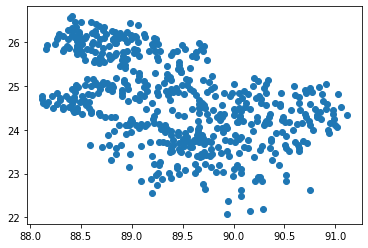

In [107]:
columns = '24/04/1995 12:00'
lats = process_data(column)['lats']
lons = process_data(column)['lons']
z = process_data(column)['z']
plt.scatter(lons,lats)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


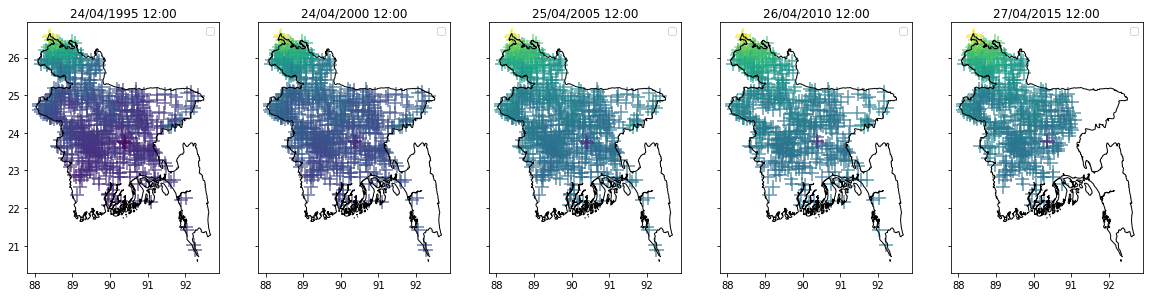

In [124]:
def plot_this(ax, column):
    data = process_data(column)
    ax.scatter(data['lons'],data['lats'], c=data['z'], alpha=0.75, marker='+',s=200)
#     img = ax.imshow([z], interpolation='nearest', vmin=min_el, vmax=max_el)
    country = gpd.read_file('./Bangladesh.shp')
    country.plot(ax=ax,color='None',linewidth=1,edgecolor='black')
    ax.set_title(column)
    ax.legend()
#     ax.xscale()
#     cbar = plt.colorbar(img)
#     cbar.set_label('elevation')
            
fig, axs = plt.subplots(1,5,figsize=(20,30),sharey=True)
for ax,column in zip(axs,well.columns[3:]):
    plot_this(ax,column)
